In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [3]:
CrimeData = pd.read_csv('2017-2018Crime.csv')
LiquorData = pd.read_csv('2017-2018Liquor.csv')

In [4]:
CrimeData['longitude'] = pd.to_numeric(CrimeData['longitude'])
CrimeData['latitude'] = pd.to_numeric(CrimeData['latitude'])

XY = {'long': CrimeData['longitude'], 'lat': CrimeData['latitude']}
XY = pd.DataFrame(data=XY)

matrix = XY.values

In [5]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)

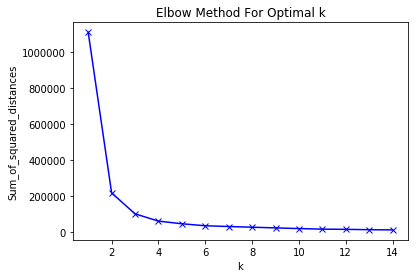

In [6]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
km = KMeans(n_clusters=4)
km = km.fit(matrix)
labels = km.labels_
results = pd.DataFrame([XY.index,labels]).T

#results for 3
results[1].value_counts()

0    731329
1      1840
3       771
2       172
Name: 1, dtype: int64

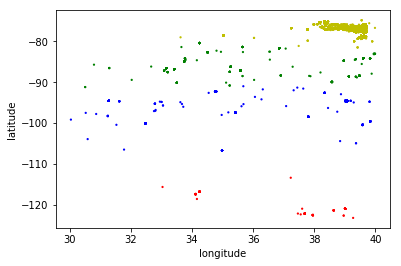

In [11]:
#color and plot based on results dataframe and it's value for the cluster number
res=results[1]
col = np.where(res==0,'y',np.where(res==1,'b',np.where(res==2,'r','g')))

CrimeData.plot.scatter(x='longitude', y='latitude', c=col, s=5, linewidth=0)

In [13]:
randomSampleCrime=CrimeData.sample(frac=0.1, replace=True, random_state=1)

In [16]:
randomSampleCrime['longitude'] = pd.to_numeric(randomSampleCrime['longitude'])
randomSampleCrime['latitude'] = pd.to_numeric(randomSampleCrime['latitude'])

WZ = {'long': randomSampleCrime['longitude'], 'lat': randomSampleCrime['latitude']}
WZ = pd.DataFrame(data=WZ)

matrix2 = WZ.values

In [17]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix2)
    Sum_of_squared_distances.append(km.inertia_)

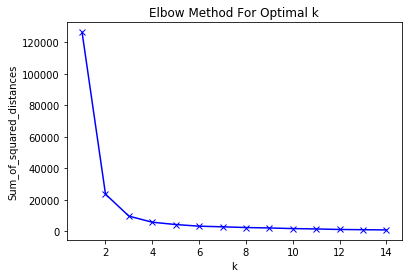

In [18]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
km = KMeans(n_clusters=4)
km = km.fit(matrix2)
labels = km.labels_
results = pd.DataFrame([WZ.index,labels]).T

#results for 4
results[1].value_counts()

0    73104
1      214
3       72
2       21
Name: 1, dtype: int64

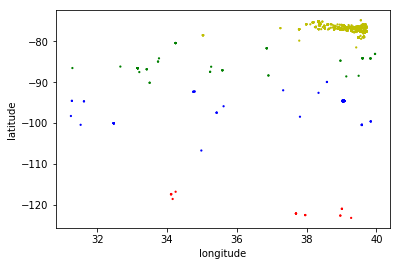

In [24]:
#color and plot based on results dataframe and it's value for the cluster number
res=results[1]
col = np.where(res==0,'y',np.where(res==1,'b',np.where(res==2,'r','g')))

randomSampleCrime.plot.scatter(x='longitude', y='latitude', c=col, s=5, linewidth=0)

In [31]:
randomSampleCrimeSmall=CrimeData.sample(frac=0.01, replace=True, random_state=1)

In [34]:
randomSampleCrimeSmall['longitude'] = pd.to_numeric(randomSampleCrimeSmall['longitude'])
randomSampleCrimeSmall['latitude'] = pd.to_numeric(randomSampleCrimeSmall['latitude'])

AB = {'long': randomSampleCrimeSmall['longitude'], 'lat': randomSampleCrimeSmall['latitude']}
AB = pd.DataFrame(data=AB)

matrix3 = AB.values

In [35]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix3)
    Sum_of_squared_distances.append(km.inertia_)

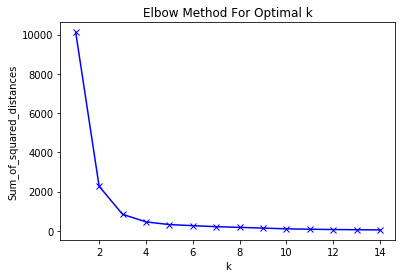

In [36]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [45]:
km = KMeans(n_clusters=4)
km = km.fit(matrix3)
labels = km.labels_
results = pd.DataFrame([AB.index,labels]).T

#results for 4
results[1].value_counts()

0    7316
1      16
3       7
2       2
Name: 1, dtype: int64

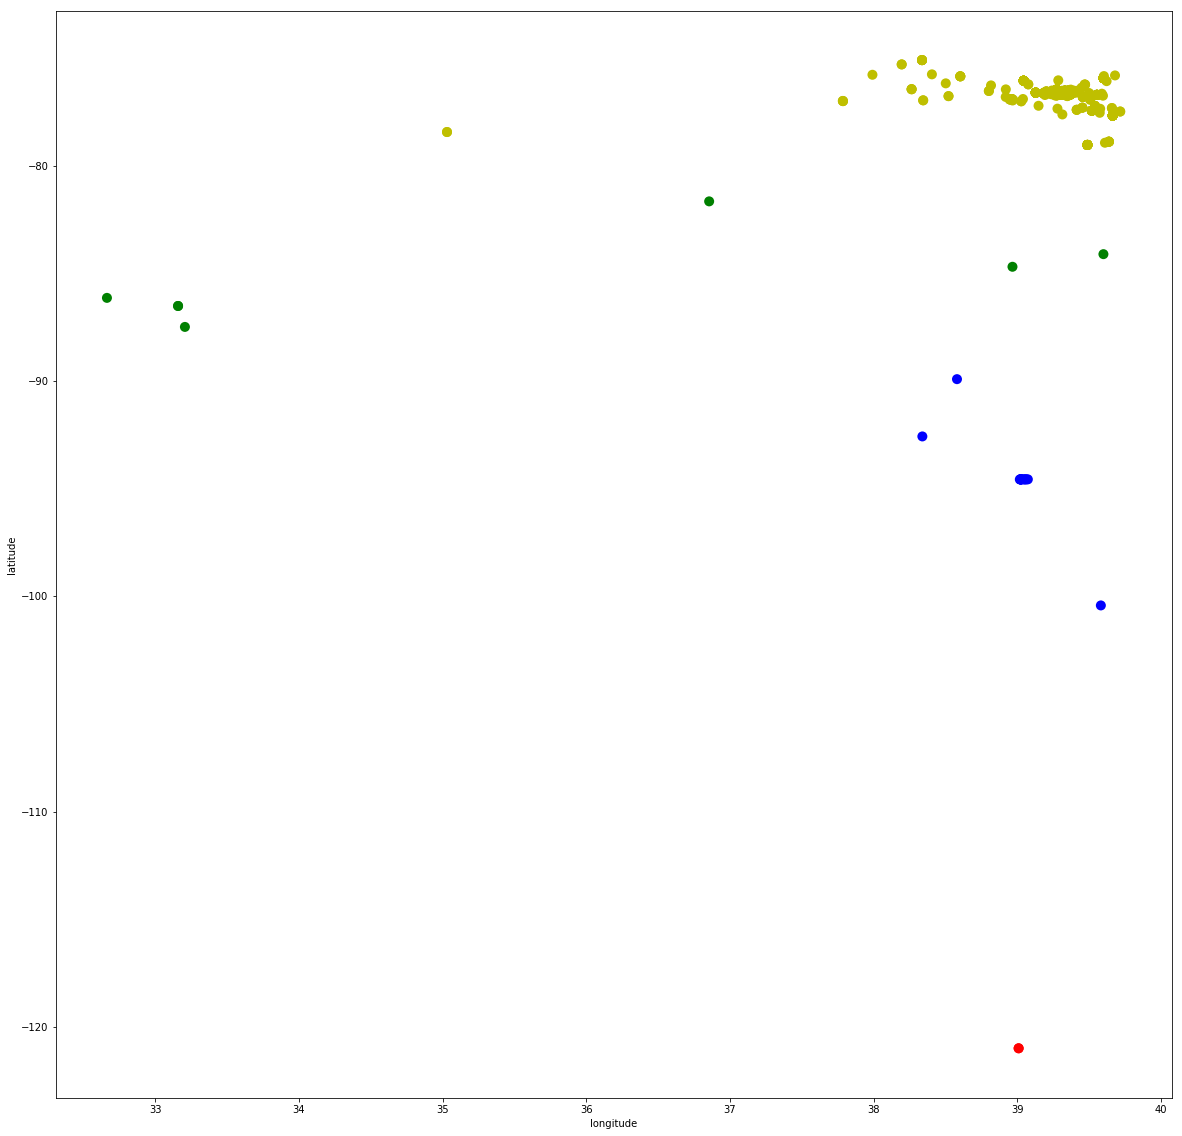

In [46]:
#color and plot based on results dataframe and it's value for the cluster number
res=results[1]
col = np.where(res==0,'y',np.where(res==1,'b',np.where(res==2,'r','g')))

randomSampleCrimeSmall.plot.scatter(x='longitude', y='latitude', c=col,  s=100, linewidth=0, figsize=(20,20))

## My Ideas So Far:

Seems like k-means isn't very good when clusters are unveven sizes.

Seems like results for all sample sizes are similar.

Later we should try different clustering than just default k-means.

Variants of k-means or k-means options, or other clustering algorithms.

That being said will try higher k-value of 5. I tried 6 but it did not work too well.

Another idea I have is maybe removing outliers.

Maybe distribution would be more uniform and better suited for clustering if outliers removed.

In [50]:
km = KMeans(n_clusters=5)
km = km.fit(matrix3)
labels = km.labels_
results = pd.DataFrame([AB.index,labels]).T

#results for 5
results[1].value_counts()

0    7293
4      26
1      16
3       4
2       2
Name: 1, dtype: int64

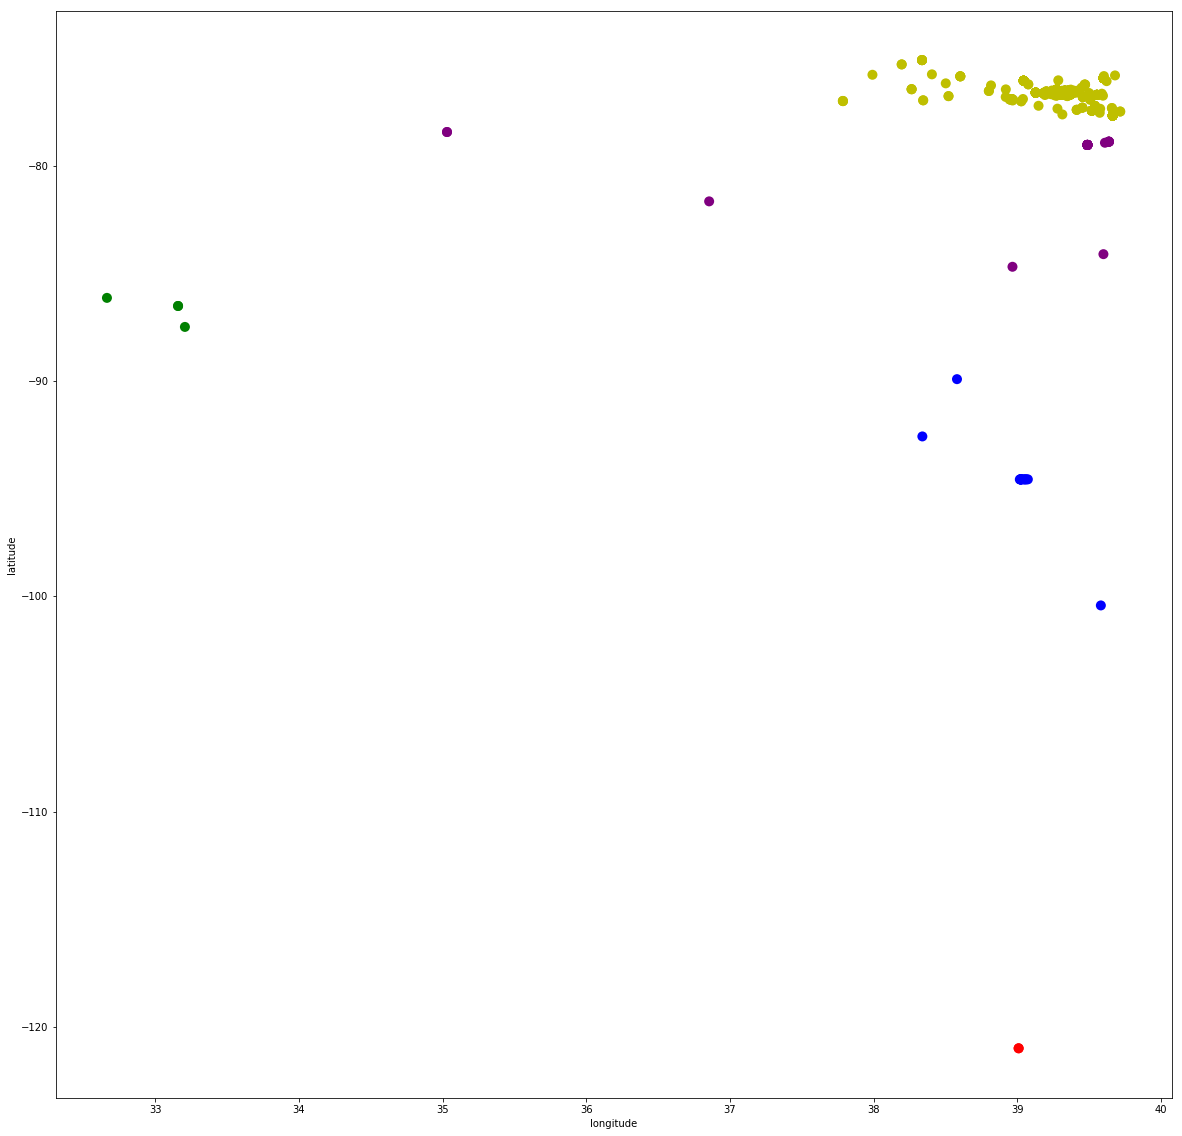

In [51]:
#color and plot based on results dataframe and it's value for the cluster number
res=results[1]
col = np.where(res==0,'y',np.where(res==1,'b',np.where(res==2,'r',np.where(res==3,'g','purple'))))

randomSampleCrimeSmall.plot.scatter(x='longitude', y='latitude', c=col, s=100, linewidth=0, figsize=(20,20))

## Test 
This isn't really removal of outliers I'm just removing all points in a certain range. I'll see how it affects clustering before actually parsing outliers correctly.

In [54]:
#filter out some longitudes below 38 and latitudes below -80

#the start and end date to be used for range in which crimes must have happened. (while those 2000+ locations were licensed)
longMin = 38
latMin = -80

#to numeric
#randomSampleCrimeSmall['longitude'] = pd.to_numeric(randomSampleCrimeSmall['longitude'])
#randomSampleCrimeSmall['latitude'] = pd.to_numeric(randomSampleCrimeSmall['latitude'])

#create mask and use it to filter crimes to only include crimes perpetrated in that date range
maskCrimeLonLat =  (randomSampleCrimeSmall['longitude'] >= longMin) & (randomSampleCrimeSmall['latitude'] >= latMin) 

NoOutliersSmallestSample = randomSampleCrimeSmall.loc[maskCrimeLonLat]

In [55]:
DF = {'long': NoOutliersSmallestSample['longitude'], 'lat': NoOutliersSmallestSample['latitude']}
DF = pd.DataFrame(data=DF)

matrix4 = DF.values

In [56]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix4)
    Sum_of_squared_distances.append(km.inertia_)

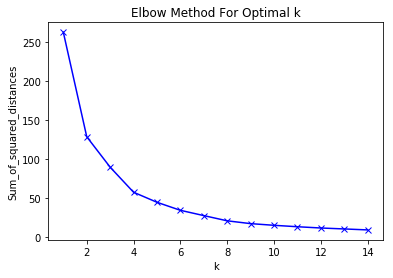

In [57]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [61]:
#seems like k-value of 5 or 6 could be good. I'll try 5
km = KMeans(n_clusters=5)
km = km.fit(matrix4)
labels = km.labels_
results = pd.DataFrame([DF.index,labels]).T

#results for 5
results[1].value_counts()

0    7152
3      69
1      52
2      21
4      16
Name: 1, dtype: int64

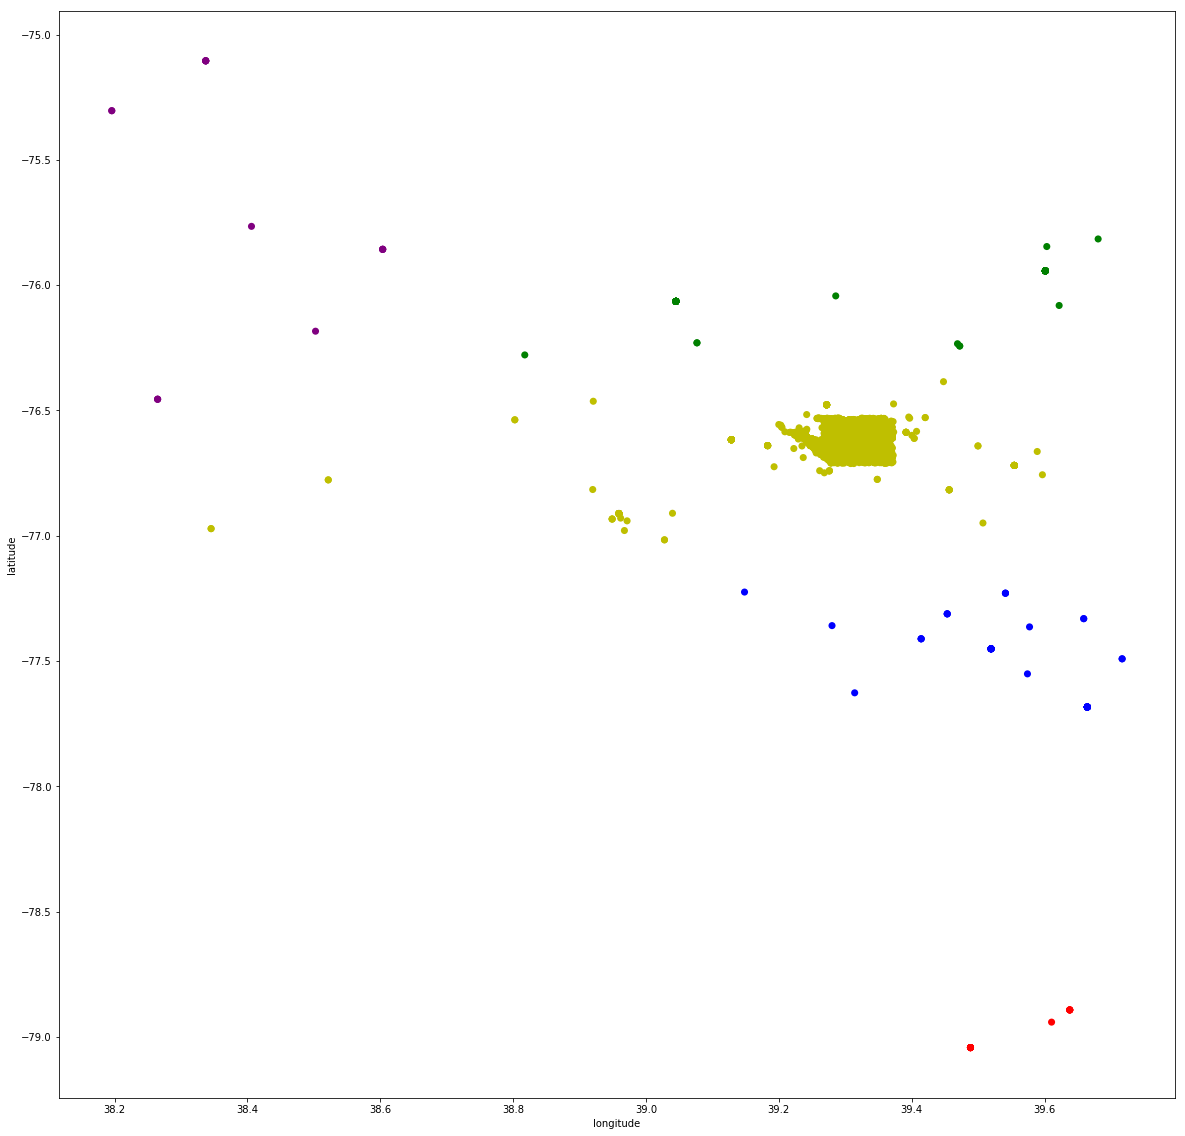

In [68]:
#color and plot based on results dataframe and it's value for the cluster number
res=results[1]
col = np.where(res==0,'y',np.where(res==1,'b',np.where(res==2,'r',np.where(res==3,'g','purple'))))

NoOutliersSmallestSample.plot.scatter(x='longitude', y='latitude', c=col, s=50, linewidth=0, figsize=(20,20))

In [64]:
#doing the same thing with all crime data

#filter out some longitudes below 38 and latitudes below -80

#the start and end date to be used for range in which crimes must have happened. (while those 2000+ locations were licensed)
longMin = 38
latMin = -80

#to numeric
#randomSampleCrimeSmall['longitude'] = pd.to_numeric(randomSampleCrimeSmall['longitude'])
#randomSampleCrimeSmall['latitude'] = pd.to_numeric(randomSampleCrimeSmall['latitude'])

#create mask and use it to filter crimes to only include crimes perpetrated in that date range
maskAllCrimeLonLat =  (CrimeData['longitude'] >= longMin) & (CrimeData['latitude'] >= latMin) 

NoOutliersAllData = CrimeData.loc[maskAllCrimeLonLat]

In [65]:
OP = {'long': NoOutliersAllData['longitude'], 'lat': NoOutliersAllData['latitude']}
OP = pd.DataFrame(data=OP)

matrix5 = OP.values

In [66]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix5)
    Sum_of_squared_distances.append(km.inertia_)

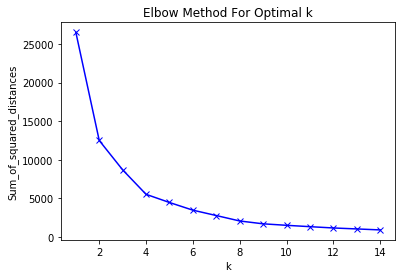

In [69]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [74]:
#seems like k-value of 4 could be good. I'll try 4
km = KMeans(n_clusters=4)
km = km.fit(matrix5)
labels = km.labels_
results = pd.DataFrame([OP.index,labels]).T

#results for 4
results[1].value_counts()

0    715821
3      8236
2      4630
1      2259
Name: 1, dtype: int64

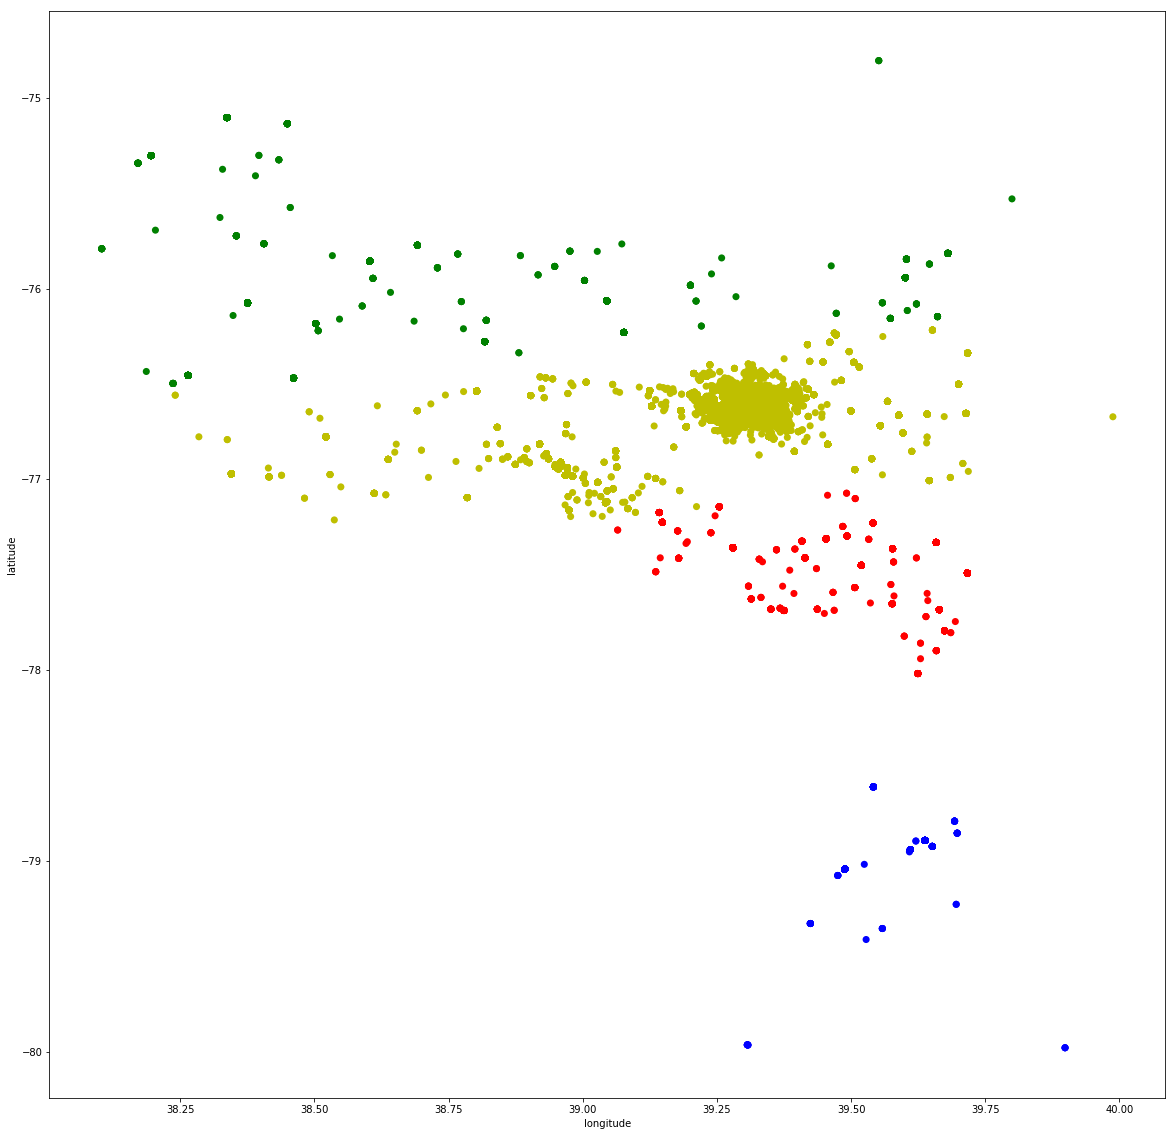

In [75]:
#color and plot based on results dataframe and it's value for the cluster number
res=results[1]
col = np.where(res==0,'y',np.where(res==1,'b',np.where(res==2,'r','g')))

NoOutliersAllData.plot.scatter(x='longitude', y='latitude', c=col, s=50, linewidth=0, figsize=(20,20))

# So Far Data Is Noisy. Clusters do not look good

Will look into working to reduce noise. Maybe look into non k-means methods for clustering since k-means is not very good for noisy non-globular data containing outliers and varied cluster sizes